Title: WIDS Palm Oil Plantation Prediction

Date : February  2019

Plan:

**First things First: snacks and chip checked, Coffee checked**

  1- Introduction
  
    - Data Field and Description
    
  2 -  Importing Libraries
    
  3 - Explore the dataset
    
    - Feature exploration and Cleaning
    
  4- Training using Convolution Neural Networks


# Introduction: 

This competiton touches on one of the major agricultural problems facing many Palm oil producing countries-  Deforestaion, biodiversity loss and Increase Green house emission.

Palm oil (Elæis guineensis) is the main cooking ingredient in the most tropical parts of the world like  Brazil, South East Asia and tropical part of Africa(particularly in Cameroon where i grew up). Extracted from the pulp of the fruit, this staple has so many uses and virtues. 

**To the Health:**

* Palm oil reduces cholestorol levels and some stusdies have found that palm oil can reduce the amount of bad LDL cholesterol in our body, keeping the hearts healthy and strong. Which brings us to the second virtue
* It slows the progression of Heart diseases
* Boosts Brain Health as it is jam-packed with a from of Vitamin E(tocotienol)  which has beneficial effects on brain health, skin and hair health too.
* Plam oil is an excellent source of the Vitamin A supplement -Beta-Carotene, whihc is important for maintaining good eye health, Also beneficial to pregnant women and their babies. ( Just a little anecdote: In my Country Cameroon, whenever an old women sees you wearing prescription eyeglasses, she will tell you "Come on!!! Take that thing off your eyes and consume more Palm oil". Happens to me all the time :') )
* Palm oil is high in beneficial antioxidant, which has been shown to reduce inflammation and Oxidative stress caused by free radicals.

**Additionally:**
 * It is also the cheapest vegetable oil in the world
 * Plam oil also produces palm kernel oil extracted from the endosperm which is mainly used in the cosmetics industry.  
 * Palm kernel waste (after the oil has beenextracted) is also used as animal feed and in co-firing in electricity generation.
 * it also has a natural preservative effect which extends the shelf life of food products That is why it is about half the package products sold in our grocery stores. From shampoo to detergents, to lipsticks, to bread, to cookies and even our Biodiesels, palm oil is present everywhere.
 
 **BUT BUT BUT.....** 
 * Plam oils cultivation is responsible for direct damage to flora and wildlife habitats due to forest conversion and the influx of palm oil workers increases pressure on wildlife through hunting .
 * Plam oils deforestation as a result of forest being destroyed, to keep up with the growing demands for palm oil, hence increasing greeenhouse gas emissions.
 * Palm oil production has major negative environmental consequences on soils (erosion potential on steep slopes) and water quality (pollution by pesticide run-off).
 * There has also been reports of Human rights violations by coorporations and companies that produce palm oil. Some of the issues incude, unsafe working conditions for the workers, Very low pay etc.
 
Despite the positive impacts and vitues of palm oil, its expansion has led to deforestation, increased carbon emissions, and biodiversity loss,.
 
# About the Challenge:

The challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. The datathon task is to train a model that takes as input a satellite image and outputs a prediction of how likely it is that the image contains an oil palm plantation. 

The dataset images are 3-meter spatial resolution, and each is labeled with whether an oil palm plantation appears in the image (0 for no plantation, 1 for any presence of a plantation).

Labeled training and test datasets are provided for model development.

# sOurce:
* https://news.mongabay.com/2016/04/palm-oil-cameroon-blessing-curse-small-scale-farmers-2/
* http://awsassets.panda.org/downloads/palmoildevelopmentcameroon_english.pdf
* https://www.excelvite.com/red-palm-oil-benefits-the-heart-brain-but-is-it-bad-for-the-environment/

**Data Fields and Description:**

**image_id** - an anonymous id unique to a given image.

**has_oilpalm** - the annotation or label for a given image, with 0 indicating no oil palm, and 1 indicating presence of oil palm plantations.

**score** - confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result. For more details on how these scores are calculated, visit this article. Please note that this is extra data that need not be incorporated in your model, but may be useful. In addition, stay tuned for a blogpost focused more deeply on the data annotation process and more!

# 1- Importing Libraries

In [53]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading and Reading data

In [54]:
# #Loading the images paths
img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

#Image paths (Amy)
# img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [55]:
# #oading the .csv file
data = pd.read_csv(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\traininglabels (1).csv")
data.sample(5)

#Label path (Amy)
# data = pd.read_csv(r"C:\Users\Amy\KaggleProject\data\traininglabels.csv")
# data.sample(5)

,image_id,has_oilpalm,score
14265,img_098762018.jpg,0,1.0000
8685,img_017172018.jpg,0,0.7952
896,img_013142017.jpg,0,1.0000
4887,img_071092017.jpg,0,1.0000
4612,img_067232017.jpg,0,1.0000


# 3 - Data Preprocessing

In [56]:
data.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [57]:
data['has_oilpalm'].value_counts(normalize = True)

0    0.938205
1    0.061795
Name: has_oilpalm, dtype: float64

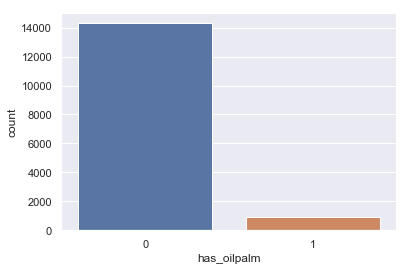

In [58]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'has_oilpalm', data = data)

In [59]:
data['score'].value_counts(normalize = True).head()

1.0000    0.834623
0.8000    0.001706
0.7992    0.001181
0.7981    0.001115
0.7976    0.000984
Name: score, dtype: float64

***************************************************************************************************************************

# Todo 1- Lets take a look at the different classes- 0 and 1

In [60]:
# We separate the classes 

label_1 = data[data['has_oilpalm']==1]
label_0 = data[data['has_oilpalm']==0]

In [61]:
# Plot the images in label 1
label_1.head()

,image_id,has_oilpalm,score
72,img_001092017.jpg,1,0.3944
75,img_001132017.jpg,1,1.0000
109,img_001712017.jpg,1,0.7543
129,img_002012017.jpg,1,1.0000
143,img_002232017.jpg,1,1.0000


In [62]:
label_1.shape

(942, 3)

In [63]:
label_0.shape

(14302, 3)

In [64]:
data.shape

(15244, 3)

To ease the image reading process we can create an additional column to the dataset with the global path of the images

In [65]:
label_1['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_1['image_id']]
label_0['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_0['image_id']]
label_1.head()

C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,image_id,has_oilpalm,score,image_path
72,img_001092017.jpg,1,0.3944,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
75,img_001132017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
109,img_001712017.jpg,1,0.7543,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
129,img_002012017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
143,img_002232017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [66]:
# We plot some of the pictures in the label_1 just to have an idea of what a plantation with oilpalm look like

haspalm_images = np.random.choice(label_1['image_path'],5)
nopalm_images = np.random.choice(label_0['image_path'],5)
haspalm_images  


array(['C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_017362017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_036282018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_018672017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_032182018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_002552018.jpg'],
      dtype=object)

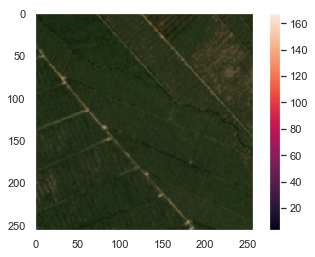

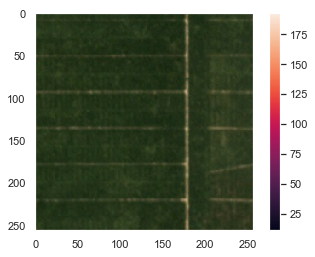

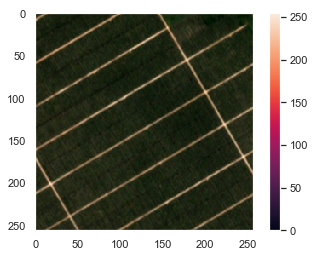

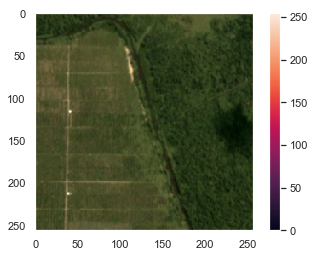

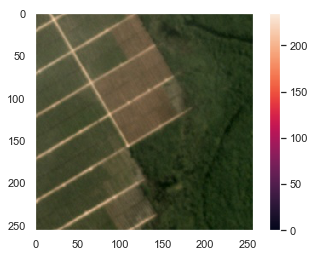

In [67]:
from PIL import Image

for image in haspalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

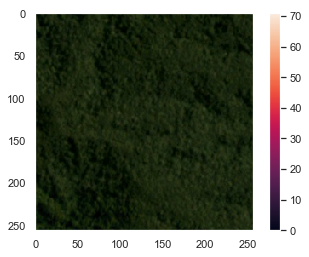

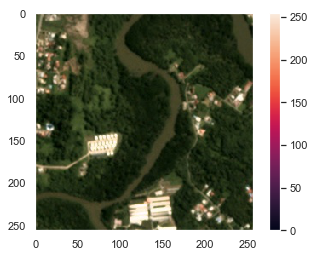

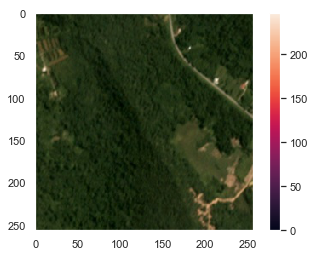

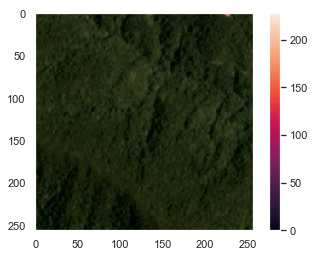

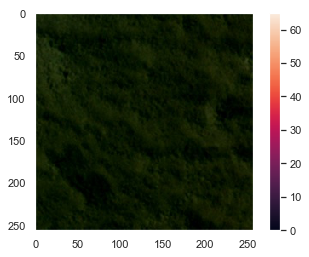

In [68]:
for image in nopalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

# Edge Detection
perform edge detection to enhance the visibility of oilpalm field lines

-Install sci-kit image : http://scikit-image.org/docs/stable/install.html

In [69]:
from skimage.color import rgb2gray
from skimage import io

# convert rgb to grayscale
#img_path = 'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_073632018.jpg'
img_path = 'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_073632018.jpg'
img = io.imread(img_path)
img_gray = rgb2gray(img)


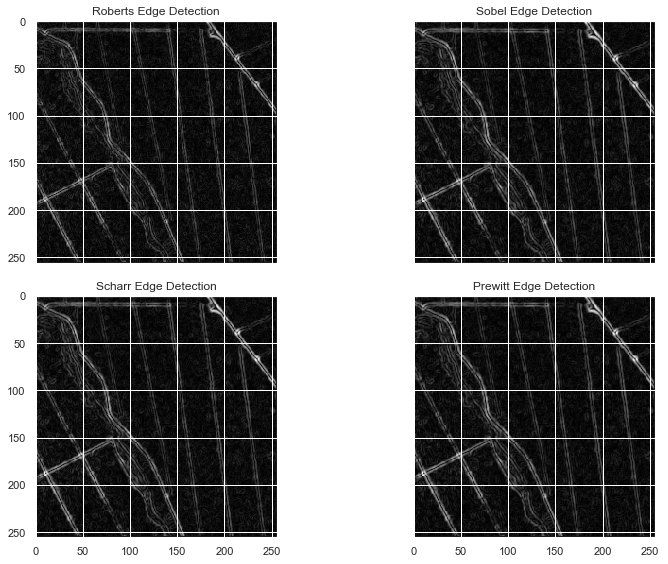

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

# Filter using sobel and robert to perform edge detection
edge_roberts = roberts(img_gray)
edge_sobel = sobel(img_gray)
edge_scharr = scharr(img_gray)
edge_prewitt = prewitt(img_gray)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(12, 8))

ax[0][0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0][0].set_title('Roberts Edge Detection')

ax[0][1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[0][1].set_title('Sobel Edge Detection')

ax[1][0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1][0].set_title('Scharr Edge Detection')

ax[1][1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1][1].set_title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()

## OBSERVATION:
- There are about 15 244 images with an equal number of score and max of 1 signifies that there is an oil palm while a 0 means no oil palm.

- There are non Null of NaN columns since the number of 'counts' in the data.describe are equivalent

- This dataset is very biase. 93 percent of the images(which corresponds to 14 302 images) does not have oilpalms while only 6 percent has oilpalms( approx. 942 images). Same with the scores, 83 percent of all scores are 1 while the remaining scores are about 16 percent.

- We can also see that the images with oil palms on them have some kind of stratifications on them while does with no oilpalms do not have these divisions.


****************************************************************************************************************************

# We Normalise the data 

In [71]:
#data = data / 255.
#do same for trst set when predicting

# Todo 2 - Split the Training set into training and validation set while preserving the ratio of 1 and 0. Also read https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator/52372042#52372042

In [72]:

# # #Loading the images paths
# img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
# img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
# img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

# # Image paths (Amy)
# # img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# # img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [73]:
from sklearn.model_selection import train_test_split

features = [x for x in data.columns if x!= 'has_oilpalm']
X = data[features]
y = data['has_oilpalm']


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y,
                                                    test_size=0.25)
print(X.shape)

(15244, 2)


In [74]:
data.head()

,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


In [75]:
data.head()

,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

columns = [x for x in data.columns if x!='has_oilpalm']


feature_cols = columns
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.25, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data['has_oilpalm']))

# Create the dataframes
X_train_1 = data.loc[train_idx, feature_cols]
y_train_1 = data.loc[train_idx, 'has_oilpalm']

X_test_1  = data.loc[test_idx, feature_cols]
y_test_1 = data.loc[test_idx, 'has_oilpalm']

In [77]:
X_train_1.shape

(11433, 2)

In [78]:
y_train_1.shape

(11433,)

In [79]:
X_test_1.shape

(3811, 2)

In [80]:
y_test_1.shape

(3811,)

In [81]:
# One Hot encode the y data
from keras.utils import to_categorical

y_train_1 = to_categorical(y_train_1)
y_test_1 = to_categorical(y_test_1)


In [82]:
# #comparing the ratios of classes in both splits. Very representative of the whole data set
# X_train.size

In [83]:
# y_train.size

In [84]:
# y_val.size

In [85]:
# X_val.size

In [86]:
y_train_1.value_counts(normalize = True)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
y_test_1.value_counts(normalize = True)

**Since we are using the flow from datatframe for botht the training and the validation data. We will have to split the images in the training folder into a train set and vaildation set folder. So we can easily extract from there. Luckily, Keras has now added Train / validation split from a single directory using ImageDataGenerator, so we can do that directly. Check this (https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator/52372042#52372042)**

*******************************************************************************************************************************

 **SPLITTING THE TRAINING IMAGES INTO TRAIN AND VALIDATION SETS FOR THE FLOW FROM DATAFRAME**

In [87]:
data.columns

Index(['image_id', 'has_oilpalm', 'score'], dtype='object')

In [88]:
data.shape

(15244, 3)

# Create directory for training and validating set

First you have to create the folder train and validate inside the original train dataset before running this code. 

In [89]:
import shutil
import os

In [90]:
# #Loading the images paths
img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

#Image paths (Amy)
# img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [91]:
def copyFile(src, dest):
    """
    copy file with error handler
    """
    try:
        shutil.copy(src,dest)
    except shutil.Error as e:
        print("Error: " + str(e))
    except IOError as e:
        print("Error: " + e.strerror)

def generate_dir(path, dir_name, df):
    """
    path (string): string contain the original path to images
    dir_name (string): string contain the name of the folder to create
    df (dataframe): dataframe containing the image_id to copy to the created folder
    """

    # define the name of the directory to be created
    folder_path = os.path.join(path,dir_name)
    try:  
        os.mkdir(folder_path)
    except OSError:  
        print ("Creation of the directory %s failed" % folder_path)
    else:  
        print ("Successfully created the directory %s " % folder_path)
        
    # Copy all the selected picture to the train folder
    for img_id in df['image_id']:
        # Declare src and dest   
        src = os.path.join(path,img_id)
        dest = os.path.join(folder_path,img_id)
        copyFile(src,dest)


In [92]:
# X_train, X_val, y_train, y_val
# generate_dir(img_train_path,'train',X_train)
# generate_dir(img_train_path,'validate',X_val)

generate_dir(img_train_path,'train',X_train_1)
generate_dir(img_train_path,'validate',X_test_1)


Creation of the directory C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\train failed
Creation of the directory C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\validate failed


In [93]:
# #I needed to do this part for the fow from dataframe

data['has_oilpalm'][data["has_oilpalm"] == 0] = "no_palm"
data['has_oilpalm'][data["has_oilpalm"] == 1] = "has_palm"
data.sample(10)


C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,image_id,has_oilpalm,score
4424,img_064432017.jpg,no_palm,1.0000
10852,img_048792018.jpg,no_palm,1.0000
5011,img_072872017.jpg,no_palm,0.8101
7463,img_108892017.jpg,has_palm,1.0000
15168,img_111602018.jpg,no_palm,0.6027
13140,img_082442018.jpg,no_palm,1.0000
6627,img_097042017.jpg,no_palm,1.0000
5763,img_084252017.jpg,no_palm,1.0000
14756,img_105672018.jpg,no_palm,1.0000
2695,img_038752017.jpg,no_palm,0.5834


# todo 4 - Data Balancing

**Why do we need To balance out dataset:**

* As we can see from above,the data set is severely imbalanced (93 : 1).


* The main motivation behind the need to preprocess imbalanced data before we feed them into a classifier is that typically classifiers are more sensitive to detecting the majority class and less sensitive to the minority class.


* Usually, data imbalance will lead to the classification output being biased, in many cases resulting in always predicting the majority class.

It is usually advisable to do data balancing on already split data. To know why read (https://beckernick.github.io/oversampling-modeling/). Also, to kmow more about he different ways of resempling or balancing classes in a dataset, read the references below.

We will be using the **SMOTE algorithm (Synthetic Minority Oversampling Technique)** to over-sample our dataset. It is a powerful sampling method that goes beyonds simply increasing or decreasing the number of datas in a dataset. How it works is by.

1- Finding the k-nearest-neighbors for minority class observations (finding similar observations)

2- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [97]:
# see this (https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras)

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'str' , random_state=12, ratio = 1.0)


X_train, y_train = sm.fit_sample(X_train_1, y_train_1)

#https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86

ValueError: could not convert string to float: 'img_079632017.jpg'

In [102]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

print('In the Training Set:\n ')
train_set = train_generator.flow_from_dataframe(dataframe = data, 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\train',
    x_col = "image_id",
    y_col = "has_oilpalm",                                           
    target_size = (64, 64),
    batch_size = 500,
    class_mode = 'categorical',
    shuffle=True,      # Set as training data
    seed = 42
)

In the Training Set:
 
Found 11433 images belonging to 2 classes.


In [40]:
print('In the Validation Set: ')
valid_generator = ImageDataGenerator(rescale = 1./255)

valid_set = valid_generator.flow_from_dataframe(dataframe = data, 
    directory= r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train\validate",
    x_col = "image_id",
    y_col = "has_oilpalm",                                           
    target_size = (64, 64),
    batch_size = 500,
    class_mode = 'categorical',
    shuffle=True,     # Set as validation data
    seed = 42
)

#test set
print("\nIn the Test Set:")
test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'categorical',
    shuffle=True,
    seed = 42
)


In the Validation Set: 
Found 3811 images belonging to 2 classes.

In the Test Set:
Found 4356 images belonging to 1 classes.


###### After you run this script, you can go and check in your directory that there is a folder create inside the original train folder that contains the images according to the dataframe you provide.

*******************************************************************************************************************************

In [47]:
# Try this if the class weight does not work

'''from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(ratio='auto')
data['has_oilpalm'] = ros.fit_sample(data['has_oilpalm'])'''

"from imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(ratio='auto')\ndata['has_oilpalm'] = ros.fit_sample(data['has_oilpalm'])"

References used for Data Balancing/ Resampling:

- https://beckernick.github.io/oversampling-modeling/
- https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
- https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758a
- https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6
- https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

# Todo 3 - Transfer Learning:

Use this link guide to install tensorflow: https://medium.com/@margaretmz/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8

In [48]:
#learning_rate = 0.01
from keras import optimizers


In [49]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from keras.optimizers import SGD, Adam
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [50]:
num_classes = 2

model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False     #freezing the weight for the first layer to keep it unaltered

sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['accuracy']) #changed optimizer just to see 



In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
STEP_SIZE_TRAIN=train_set.n//train_set.batch_size

STEP_SIZE_VALID=valid_set.n//train_set.batch_size

train_model = model.fit_generator(train_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 10,
                    class_weight = class_weight,
                    validation_data = valid_set,
                    validation_steps=STEP_SIZE_VALID)



Epoch 1/10
22/22 [==============================] - 342s 16s/step - loss: 0.3878 - acc: 0.8853 - val_loss: 0.2362 - val_acc: 0.9383
Epoch 2/10
 6/22 [=======>......................] - ETA: 3:56 - loss: 0.2244 - acc: 0.9430

# Try for later

- Increase or decrease the lr
- try this data balancing :
    
        from sklearn.utils import compute_class_weight
        classWeight = compute_class_weight('balanced', outputLabels, outputs) 
        classWeight = dict(enumerate(classWeight))

- One hot encoding the target and train values like so

        from keras.utils.np.utils import to_categorical
        y_train = to_categorical(y_train)
        y_val = to_categorical(y_val)

# Validation Accuracy and Loss

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()


In [ ]:
plot_accuracy_and_loss(train_model)

# Sample predictions

In [ ]:
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')

In [ ]:
# https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
num2class_label_transformer = lambda l: ['notpalm' if x == 0 else 'palm' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'notpalm' else 1 for x in l]

test_imgs = [img_to_array(load_img(img, target_size= (64, 64)) for img in img_test_path)]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in img_test_path]


test_labels_enc = class2num_label_transformer(test_labels)
test_labels

In [ ]:
'''# Part 3 - Making new predictions 
# https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

test_image = image.load_img('"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set\img_000682018.jpg"', target_size = (64, 64))
test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction_1 = 'palm'
else:
    prediction_1 = 'no_palm''''

In [ ]:
# Basic performance Measure
prediction = model.predict_classes(test_set, verbose=0)    #remember to scale the test set image
prediction = num2class_label_transformer(prediction)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=prediction, 
                                      classes=list(set(test_labels)))

# Submission File

In [52]:
'''submission = pd.DataFrame({'image_id':image_id , 'has_oilpalm':prediction})
submission.head()
submission.to_csv("submission.csv", index=False)'''

0


Referencec:
- https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.kaggle.com/jhonatansilva31415/whales-a-simple-guide
- https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
- https://www.kaggle.com/gpreda/cats-or-dogs-using-cnn-with-transfer-learning
- https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86
- https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2
- https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

# STOPPED HERE FOR NOW 


*******************************************************************************************************************************

# 4- Image Classification using Convolution Neural Network

**Image classification using CNN is always done in 3 parts**

1. Convolution:
2. Pooling
3. Flatenning
4. Full Connection

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential       

from keras.layers import Conv2D           

from keras.layers import MaxPooling2D

from keras.layers import Flatten

from keras.layers import Dense
 

**Explanations:**

**Step 1** - To initialise our neural network as a sequential network

**Step 2** - To perform the convolution operation on the training inmage. 2D becasue we are working with images, which are basically 2D arrays.

**Step 3** - Used for pooling operations- simplifies the image collected by the convolutional layer and creates a condensed version of the information contained in them.

**Step 4** - Used for flettening the convolutional array. Flatteening is the process of converting the 2D arrays into single linear continuous array.

**Step 5** - To perfrom the ful connnection stated above

In [ ]:
# We create an object of the sequential class
model = Sequential()

In [ ]:
# Step 1- Convolution step:
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

This step takes 4 parameters: 

* 32 is the number of filters.

* (3,3) is the shape of each filter.

* input_shape our cnn will take = (64, 64, 3) - 64 by 64 resolution and 3 for RBG color image.

* 'Relu' recifier funtion will be our activation function

In [ ]:
# Step 2- Pooling step:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 3 - Flattening
model.add(Flatten())

In [ ]:
#step 4 - Full connection
model.add(Dense(128, activation = 'relu'))

Dense is the function to add a fully connected layer. The unit(in this case 128) is the number of nodes that should be present in the hidden layer. We will treak it until we get the optimal unit

Since we are dealing with a Binary classification problem( either hasoilpalm or not), We will initialise our output layer so that it has just a single node.

In [ ]:
# Initialising output node
model.add(Dense(units = 1, activation = 'sigmoid'))